In [10]:
# %load state_graph_example.py
"""
Created on Fri Feb 26 23:44:02 2021

@author: User
"""
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

Evt_SYMB="Evt"

#import sys
#old_target=sys.stdout
#sys.stdout = open('state_machine_checker_v1.txt', 'w')
#


In [11]:
def draw_graph(G):
    
    fig, ax = plt.subplots(figsize=(16, 12))
    
    pos = nx.circular_layout(G)
    #pos = nx.planar_layout(G)
    #pos = nx.kamada_kawai_layout(G)
    #pos = nx.multipartite_layout(G)  
    nx.draw(G, pos,with_labels=True,connectionstyle='arc3, rad = 0.07',node_size=1500, node_color="skyblue", node_shape="s", font_size=15, font_weight="bold",alpha=0.5, linewidths=40,width=4) 
    edge_labels = nx.get_edge_attributes(G,Evt_SYMB)
    nx.draw_networkx_edge_labels(G, pos, labels = edge_labels,font_color="grey",font_size=13)
    graph_title=G.graph["title"]
    plt.title(graph_title+"\n\n")
    plt.savefig(graph_title+"state_diagram_graph_structure"+".png",dpi=300) 
    
    plt.show()


def construct_graph_coffee_machine(file_to_read=None):
    
    G = nx.MultiDiGraph()
    #G.add_edge("idle","idle",Evt="simple sanity check")
    G.add_edge("idle","deposit",Evt="coin inserted")
    G.add_edge("deposit","deposit",Evt="coin inserted")
    G.add_edge("deposit","idle",Evt="coin return")
    G.add_edge("deposit","selection",Evt="rigth amount entered")
    G.add_edge("selection","idle",Evt="coin return")
    G.add_edge("selection","making coffee",Evt="button pushed")
    G.add_edge("making coffee","idle",Evt="cup removed")
    G.add_edge("making coffee","maintenance",Evt="sensor alert")
    G.add_edge("maintenance","idle",Evt="reset button")
    G.add_edge("off", "idle",Evt="power up")
    #G.add_node("fake")
    # G.add_edge("idle","maintenance",Evt="self check failed")
    # G.add_edge("idle","off",Evt="power off")
    # G.add_edge("deposit","off",Evt="power off")
    # G.add_edge("selection","off",Evt="power off")
    # G.add_edge("making coffee","off",Evt="power off")
    # G.add_edge("maintenance","off",Evt="power off")
    
    G.graph["title"]="coffee_machine"
    return G


def construct_graph_pin_automata(file_to_read=None):
    
    G = nx.MultiDiGraph()
    #G.add_edge("idle","idle",Evt="simple sanity check")
    G.add_edge("start","wait for PIN",Evt="card inserted")
    G.add_edge("wait for PIN","1st try", Evt="enter PIN")
    G.add_edge("1st try","2st try", Evt="PIN not OK")
    G.add_edge("2st try","3rd try", Evt="PIN not OK")  
    G.add_edge("3rd try", "eat card", Evt="PIN not OK")  
    G.add_edge("1st try", "access to account", Evt="PIN OK")   
    G.add_edge("2st try", "access to account", Evt="PIN OK")   
    G.add_edge("3rd try", "access to account", Evt="PIN OK")   
    
    #G.add_node("fake")
    # G.add_edge("idle","maintenance",Evt="self check failed")
    # G.add_edge("idle","off",Evt="power off")
    # G.add_edge("deposit","off",Evt="power off")
    # G.add_edge("selection","off",Evt="power off")
    # G.add_edge("making coffee","off",Evt="power off")
    # G.add_edge("maintenance","off",Evt="power off")

    G.graph["title"]="pin_automata"    
    return G


def construct_graph_count_double_zeros_automata_v1(file_to_read=None):
    
    G = nx.MultiDiGraph()
    #G.add_edge("idle","idle",Evt="simple sanity check")
    G.add_edge("S1","S2",Evt="0")
    G.add_edge("S1","S1",Evt="1")
    G.add_edge("S2","S1",Evt="0")
    G.add_edge("S2","S2",Evt="1")

    # G.add_edge("maintenance","off",Evt="power off")

    G.graph["title"]="count_double_zeros_automata_v1"    
    return G


def construct_graph_count_double_zeros_automata_v2(file_to_read=None):
    
    G = nx.MultiDiGraph()
    #G.add_edge("idle","idle",Evt="simple sanity check")
    G.add_edge("S1","S2",Evt="0")
    G.add_edge("S1","S1",Evt="1")
    G.add_edge("S2","S3",Evt="0")
    G.add_edge("S2","S2",Evt="1")    
    G.add_edge("S3","S1",Evt="1")

    # G.add_edge("maintenance","off",Evt="power off")

    G.graph["title"]="count_double_zeros_automata_v1"    
    return G

def degrees(G):
    dg=pd.DataFrame(G.degree(),columns=["STATE","degree"])
    indg=pd.DataFrame(G.in_degree(),columns=["STATE","in_degree"]).drop(columns=["STATE"])
    outdg=pd.DataFrame(G.out_degree(),columns=["STATE","out_degree"]).drop(columns=["STATE"])
    
    avg_neighbourhood_dg=pd.Series(nx.average_neighbor_degree(G)).to_frame("avg_neighg_degree").reset_index().drop(columns=["index"])
    decombo=pd.concat([dg,indg,outdg,avg_neighbourhood_dg],axis=1)
    decombo=decombo.set_index("STATE")
    print(decombo)
    return decombo
        
def neigbours(G):
    nodes=list(G.nodes)
    for nd in nodes:
        a=[ngh for ngh in G[nd]]
        print(nd+" : "+str(a))

def simple_paths(G, source, target):
    #nodes of simple paths 
    simple_paths_list=nx.all_simple_paths(G, source, target)
    for path in simple_paths_list:     
        print((" -> ").join(path))

    
def hopbyhop_simple_paths(G, source, target):
    #To get each path as the corresponding list of edges, you can use the networkx.utils.pairwise() helper function:    
    paths=nx.all_simple_paths(G, source, target)
    for path in map(nx.utils.pairwise, paths):
        print(list(path),"\n")
        
    
def hopbyhop_simple_paths_and_attributes(G, source, target):
    #To get each path as the corresponding list of edges, you can use the networkx.utils.pairwise() helper function:    
    paths=nx.all_simple_paths(G, source, target)
    newpath_list=[]
    for path in map(nx.utils.pairwise, paths):
        newpath=[]
        for nodes in path:
            a,b=nodes
            c=G.get_edge_data(*nodes)[0][Evt_SYMB]
            #triple=a+" -> "+b+" : "+c
            triple=c+" : "+a+" -> "+b
            newpath.append(triple)
        newpath_list.append("] -> ".join(newpath))
    for p in newpath_list:
        print(p)
        print("\n")
            
def simple_paths_and_attributes_for_all_nodes(G):
    nodes=list(G.nodes)
    for i in nodes:
        for j in reversed(nodes):
            hopbyhop_simple_paths_and_attributes(G, i, j)           



def simple_paths_for_all_nodes(G):
    nodes=list(G.nodes)
    for i in nodes:
        for j in reversed(nodes):
            simple_paths(G, i, j)



def self_cyclic_nodes_in_the_graph(G):
    sc=list(nx.nodes_with_selfloops(G))
    print(sc)
    return sc




    
def simple_cycles_for_all_nodes(G):
    cycles=list(nx.simple_cycles(G))
    for c in cycles:
        print(c)
    return cycles

def simple_cycles_and_attributes_for_all_nodes(G):
    #To get each path as the corresponding list of edges, you can use the networkx.utils.pairwise() helper function:    
    paths=list(nx.simple_cycles(G))
    for path in paths:
        ## add start node to the end  --> to see complete sequence of Evts in the cycle
        path.append(path[0])
    newpath_list=[]
    for path in map(nx.utils.pairwise, paths):

        newpath=[]
        for nodes in path:
            a,b=nodes
            c=G.get_edge_data(*nodes)[0][Evt_SYMB]
            #triple=a+" -> "+b+" : "+c
            triple=c+" : "+a+" -> "+b
            newpath.append(triple)
        newpath_list.append("] -> ".join(newpath))
    for p in newpath_list:
        print(p)
        print("\n")

def nodes_in_the_graph(G,verbose=True):
    nodes=list(G.nodes)
    if verbose==True:
        print(nodes)
    return(nodes)

def edges_and_attributes_in_the_graph_v1(G):
    res=[]
    for node1, node2, data in G.edges.data():
        print(node1+" -> "+node2+" : "+str(data))
        res.append((node1,node2,data))
    return(res)

def edges_and_attributes_in_the_graph_v2(G,attr=Evt_SYMB,verbose=True):
    res=[]
    dd=nx.get_edge_attributes(G, attr)
    for k,v in dd.items():
        node1=k[0]
        node2=k[1]
        edge_label=v
        res.append((node1,node2,edge_label))
        if verbose==True:
            print(node1+" -> "+node2+" : "+edge_label)
    return res

def edge_types_in_the_graph(G,verbose=True):
    edge_types=[]
    for node1, node2, data in G.edges.data():
        edge_types.append(data[Evt_SYMB])
    edge_types=set(edge_types)
    if verbose==True:
        print(edge_types)
    return(list(edge_types))
    
def shortest_paths_for_all_nodes(G):
    sp=list(nx.all_pairs_shortest_path_length(G))
    print(sp)
    return sp


def unconnected_nodes_in_the_graph(G):
    unc=list(nx.isolates(G))
    print(unc)
    return unc

def TransitionTable(G):
    edgetypes=edge_types_in_the_graph(G,verbose=False)
    nodetypes=nodes_in_the_graph(G,verbose=False)
    transtable=pd.DataFrame({},columns=edgetypes,index=nodetypes).fillna("_")
    trans=edges_and_attributes_in_the_graph_v2(G,attr=Evt_SYMB,verbose=False)
    for tran in trans:
        s,t,e=tran
        transtable.loc[s,e]=t
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(transtable)
        
def condensed_graph(G):
    GC=nx.condensation(G)
    mapping_dict=GC.graph["mapping"]
    count_of_mapped_nodes=len(list(set(mapping_dict.values())))
    print("count of final nodes:",count_of_mapped_nodes)

    print("node mappings:\n",GC.graph["mapping"])
    return GC
   


In [12]:
G=construct_graph_coffee_machine()
#G=construct_graph_pin_automata()
#G=construct_graph_count_double_zeros_automata_v1()
#G=construct_graph_count_double_zeros_automata_v2()

# nx.number_of_edges(u="making coffee", v="idle")
# simple_paths(G, source="making coffee", target="idle")
# hopbyhop_simple_paths(G, source="making coffee", target="idle")
# hopbyhop_simple_paths_and_attributes(G, source="making coffee", target="idle")
# hopbyhop_simple_paths_and_attributes(G, source="idle", target=["making coffee","maintenance"])


In [13]:
print("STATES:")
nodes=nodes_in_the_graph(G)
print("Number of states: ", G.order())
print("Number of transitions: ", G.size())
print("")


STATES:
['idle', 'deposit', 'selection', 'making coffee', 'maintenance', 'off']
Number of states:  6
Number of transitions:  10



In [14]:
print("CONNECTIVITY TABLE:")
degrees(G)
print("")


CONNECTIVITY TABLE:
               degree  in_degree  out_degree  avg_neighg_degree
STATE                                                          
idle                6          5           1                3.0
deposit             5          2           3                2.0
selection           3          1           2                1.5
making coffee       3          1           2                1.0
maintenance         2          1           1                1.0
off                 1          0           1                1.0



In [15]:
print("NEIGBOUR STATES:")
neigbours(G)
print("")  


NEIGBOUR STATES:
idle : ['deposit']
deposit : ['deposit', 'idle', 'selection']
selection : ['idle', 'making coffee']
making coffee : ['idle', 'maintenance']
maintenance : ['idle']
off : ['idle']



In [16]:
print("EVENT TYPES")
edge_types_in_the_graph(G)
print("")


EVENT TYPES
{'power up', 'cup removed', 'button pushed', 'reset button', 'sensor alert', 'coin return', 'rigth amount entered', 'coin inserted'}



In [17]:
print("SELF CYCLIC STATES")
self_cyclic_nodes_in_the_graph(G)
print("")


SELF CYCLIC STATES
['deposit']



In [18]:
print("ISOLATE/UNCONNECTED NODES")
unconnected_nodes_in_the_graph(G)
print("")


ISOLATE/UNCONNECTED NODES
[]



In [19]:
#Strong connectivity
print("STRONG CONNECTIVITY PROPERTIES:")
print("is strongly connected: ", nx.is_strongly_connected(G)) # A directed graph is strongly connected if and only if every vertex in the graph is reachable from every other vertex.
print("number of strongly connected components: ", nx.number_strongly_connected_components(G))
print("List of strongly connected components:")
print(list(nx.strongly_connected_components(G)))
print("Largest strongly connected components:")
print(max(nx.strongly_connected_components(G), key=len)) # FSM can  be strongly connected. Strongly connected FSM must include all nodes
print("Smallest strongly connected components:")
print(min(nx.strongly_connected_components(G), key=len))
print("")


STRONG CONNECTIVITY PROPERTIES:
is strongly connected:  False
number of strongly connected components:  2
List of strongly connected components:
[{'making coffee', 'deposit', 'idle', 'selection', 'maintenance'}, {'off'}]
Largest strongly connected components:
{'making coffee', 'deposit', 'idle', 'selection', 'maintenance'}
Smallest strongly connected components:
{'off'}



In [20]:
#Weak connectivity
print("WEAK CONNECTIVITY PROPERTIES:")
print("is weakly connected: ", nx.is_weakly_connected(G)) # A directed graph is weakly connected if and only if the graph is connected when the direction of the edge between nodes is ignored
print("number of weakly connected components: ", nx.number_weakly_connected_components(G))
print("List of weakly connected components:")
print(list(nx.weakly_connected_components(G)))
print("")


WEAK CONNECTIVITY PROPERTIES:
is weakly connected:  True
number of weakly connected components:  1
List of weakly connected components:
[{'making coffee', 'deposit', 'idle', 'selection', 'off', 'maintenance'}]



In [21]:
#Attracting components
print("ATTRACTING COMPONENTS PROPERTIES:")
print("is the graph attracting component: ", nx.is_attracting_component(G)) # Returns True if G consists of a single attracting component
print("number of attracting components: ", nx.number_attracting_components(G))
print("List of attracting components:")
print(list(nx.attracting_components(G))) # An attracting component in a directed graph G is a strongly connected component with the property that a random walker on the graph will never leave the component, once it enters the component.
print("")


ATTRACTING COMPONENTS PROPERTIES:
is the graph attracting component:  False
number of attracting components:  1
List of attracting components:
[{'making coffee', 'deposit', 'idle', 'selection', 'maintenance'}]



In [22]:
print("TRANSITIONS and EVENTS")
edges_and_attributes_in_the_graph_v2(G)
print("")


TRANSITIONS and EVENTS
idle -> deposit : coin inserted
deposit -> deposit : coin inserted
deposit -> idle : coin return
deposit -> selection : rigth amount entered
selection -> idle : coin return
selection -> making coffee : button pushed
making coffee -> idle : cup removed
making coffee -> maintenance : sensor alert
maintenance -> idle : reset button
off -> idle : power up



In [23]:
print("TRANSITIONS TABLE")
TransitionTable(G)
print("")


TRANSITIONS TABLE
              power up cup removed  button pushed reset button sensor alert  \
idle                 _           _              _            _            _   
deposit              _           _              _            _            _   
selection            _           _  making coffee            _            _   
making coffee        _        idle              _            _  maintenance   
maintenance          _           _              _         idle            _   
off               idle           _              _            _            _   

              coin return rigth amount entered coin inserted  
idle                    _                    _       deposit  
deposit              idle            selection       deposit  
selection            idle                    _             _  
making coffee           _                    _             _  
maintenance             _                    _             _  
off                     _                    _    

In [24]:
print("SHORTEST PATH LENGTHS ")
shortest_paths_for_all_nodes(G)
print("")


SHORTEST PATH LENGTHS 
[('idle', {'idle': 0, 'deposit': 1, 'selection': 2, 'making coffee': 3, 'maintenance': 4}), ('deposit', {'deposit': 0, 'idle': 1, 'selection': 1, 'making coffee': 2, 'maintenance': 3}), ('selection', {'selection': 0, 'idle': 1, 'making coffee': 1, 'deposit': 2, 'maintenance': 2}), ('making coffee', {'making coffee': 0, 'idle': 1, 'maintenance': 1, 'deposit': 2, 'selection': 3}), ('maintenance', {'maintenance': 0, 'idle': 1, 'deposit': 2, 'selection': 3, 'making coffee': 4}), ('off', {'off': 0, 'idle': 1, 'deposit': 2, 'selection': 3, 'making coffee': 4, 'maintenance': 5})]



In [25]:
print("TRANSITION PATHS\n(Paths are simple paths with no repeated nodes)")
simple_paths_for_all_nodes(G)
print("")


TRANSITION PATHS
(Paths are simple paths with no repeated nodes)
idle -> deposit -> selection -> making coffee -> maintenance
idle -> deposit -> selection -> making coffee
idle -> deposit -> selection
idle -> deposit
deposit -> selection -> making coffee -> maintenance
deposit -> selection -> making coffee
deposit -> selection
deposit -> idle
deposit -> selection -> idle
deposit -> selection -> making coffee -> idle
deposit -> selection -> making coffee -> maintenance -> idle
selection -> making coffee -> maintenance
selection -> making coffee
selection -> idle -> deposit
selection -> making coffee -> idle -> deposit
selection -> making coffee -> maintenance -> idle -> deposit
selection -> idle
selection -> making coffee -> idle
selection -> making coffee -> maintenance -> idle
making coffee -> maintenance
making coffee -> idle -> deposit -> selection
making coffee -> maintenance -> idle -> deposit -> selection
making coffee -> idle -> deposit
making coffee -> maintenance -> idle -> de

In [26]:
print("CYCLIC TRANSITION PATHS\n(closed paths/ circuits)")
simple_cycles_for_all_nodes(G)
print("")
print("TRANSITION PATHS AND EVENTS\n(Paths are simple paths with no repeated nodes)")
print("")
simple_paths_and_attributes_for_all_nodes(G)



CYCLIC TRANSITION PATHS
(closed paths/ circuits)
['deposit']
['making coffee', 'maintenance', 'idle', 'deposit', 'selection']
['making coffee', 'idle', 'deposit', 'selection']
['selection', 'idle', 'deposit']
['deposit', 'idle']

TRANSITION PATHS AND EVENTS
(Paths are simple paths with no repeated nodes)

coin inserted : idle -> deposit] -> rigth amount entered : deposit -> selection] -> button pushed : selection -> making coffee] -> sensor alert : making coffee -> maintenance


coin inserted : idle -> deposit] -> rigth amount entered : deposit -> selection] -> button pushed : selection -> making coffee


coin inserted : idle -> deposit] -> rigth amount entered : deposit -> selection


coin inserted : idle -> deposit


rigth amount entered : deposit -> selection] -> button pushed : selection -> making coffee] -> sensor alert : making coffee -> maintenance


rigth amount entered : deposit -> selection] -> button pushed : selection -> making coffee


rigth amount entered : deposit -> sel

In [27]:
print("CYCLIC TRANSITION PATHS AND EVENTS\n(loops)")
print("")
simple_cycles_and_attributes_for_all_nodes(G)


CYCLIC TRANSITION PATHS AND EVENTS
(loops)

coin inserted : deposit -> deposit


sensor alert : making coffee -> maintenance] -> reset button : maintenance -> idle] -> coin inserted : idle -> deposit] -> rigth amount entered : deposit -> selection] -> button pushed : selection -> making coffee


cup removed : making coffee -> idle] -> coin inserted : idle -> deposit] -> rigth amount entered : deposit -> selection] -> button pushed : selection -> making coffee


coin return : selection -> idle] -> coin inserted : idle -> deposit] -> rigth amount entered : deposit -> selection


coin return : deposit -> idle] -> coin inserted : idle -> deposit




In [28]:

print("COLLAPSED GRAPH\n(nodes that can be merged)")
condensed_graph(G)



COLLAPSED GRAPH
(nodes that can be merged)
count of final nodes: 2
node mappings:
 {'making coffee': 0, 'deposit': 0, 'idle': 0, 'selection': 0, 'maintenance': 0, 'off': 1}


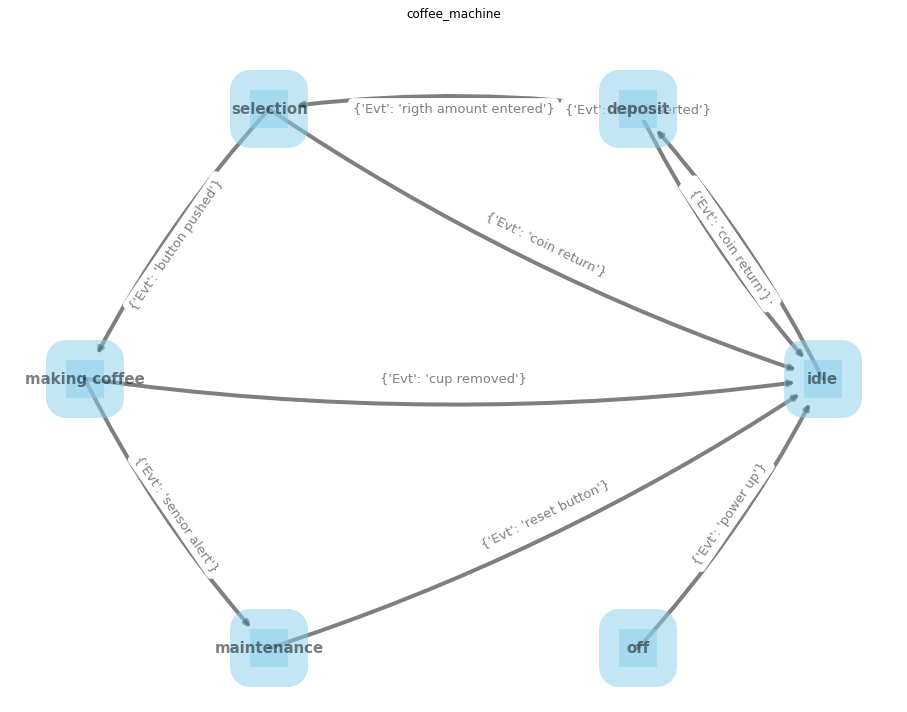

In [29]:
draw_graph(G)

In [30]:
df=nx.to_pandas_edgelist(G)
df.to_csv(G.graph["title"]+"state_diagram_graph_structure.csv",index=False)
#sys.stdout.close()

if False:
    #load graph from file
    dfl=pd.read_csv("state_diagram_graph_structure.csv")
    GFL=nx.from_pandas_edgelist(dfl,edge_attr=Evt_SYMB)
    draw_graph(GFL)
